# Installing the Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Desktop\New folder (3)\Project Session\My PROJECTS DATASETS\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df["bmi"].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [8]:
# filling Null Values

df["bmi"]=df["bmi"].fillna(df["bmi"].mean())
df["bmi"].isnull().any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.drop(["id"],axis=1,inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Some Basic Visualization

<AxesSubplot:>

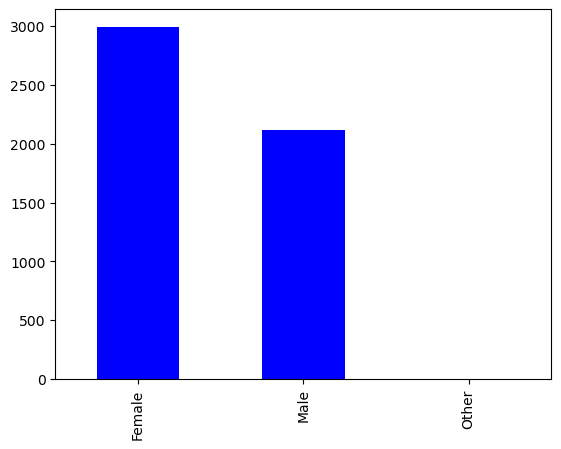

In [11]:
#Gender Distribution in the Dataset

df["gender"].value_counts().plot.bar(color="blue")

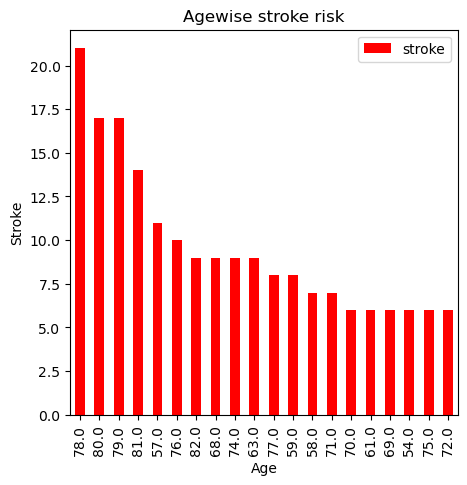

In [12]:
age_by_stroke=df.groupby("gender")["stroke"].sum().sort_values(ascending=False)
#Agewise Stroke [Top 20]

age_by_stroke=df.groupby("age")["stroke"].sum().sort_values(ascending=False).nlargest(20)     
age_by_stroke.plot.bar(color="red",figsize=(5,5),fontsize=10)
plt.xlabel("Age",fontsize=10)
plt.ylabel("Stroke",fontsize=10)
plt.title("Agewise stroke risk")
plt.show()


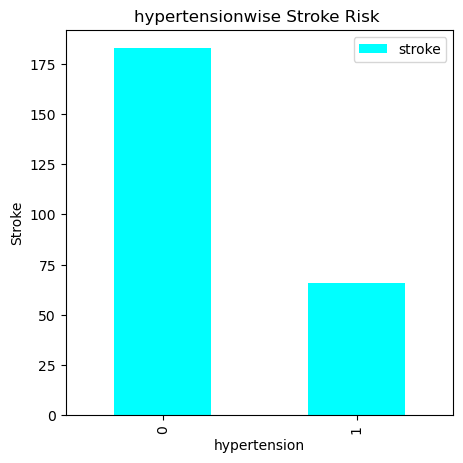

In [13]:
#Hypertensionwise Stroke 

Hypertension_by_stroke=df.groupby("hypertension")["stroke"].sum().sort_values(ascending=False)
Hypertension_by_stroke.plot.bar(color="cyan",figsize=(5,5),fontsize=10)
plt.xlabel("hypertension",fontsize=10)
plt.ylabel("Stroke",fontsize=10)
plt.title("hypertensionwise Stroke Risk ")
plt.show()


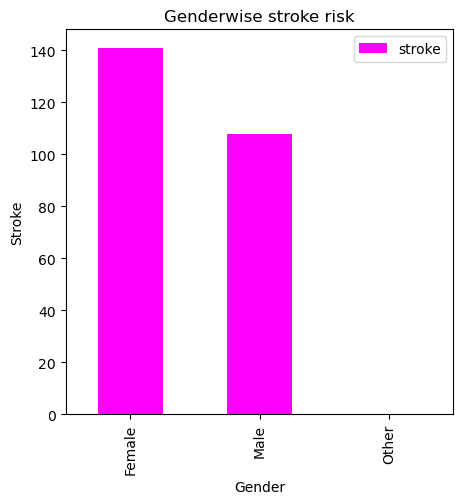

In [14]:
#Gnederwise Stroke

gender_by_stroke=df.groupby("gender")["stroke"].sum().sort_values(ascending=False).nlargest(20)     
gender_by_stroke.plot.bar(color="magenta",figsize=(5,5),fontsize=10)
plt.xlabel("Gender",fontsize=10)
plt.ylabel("Stroke",fontsize=10)
plt.title("Genderwise stroke risk")
plt.show()


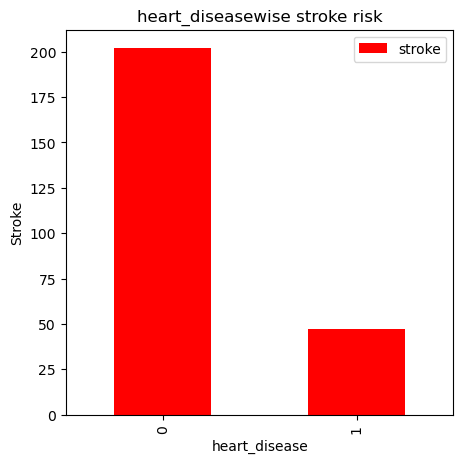

In [15]:
#Heartdiseasewise Stroke

heart_disease_by_stroke=df.groupby("heart_disease")["stroke"].sum().sort_values(ascending=False).nlargest(20)     
heart_disease_by_stroke.plot.bar(color="red",figsize=(5,5),fontsize=10)
plt.xlabel("heart_disease",fontsize=10)
plt.ylabel("Stroke",fontsize=10)
plt.title("heart_diseasewise stroke risk")
plt.legend()
plt.show()


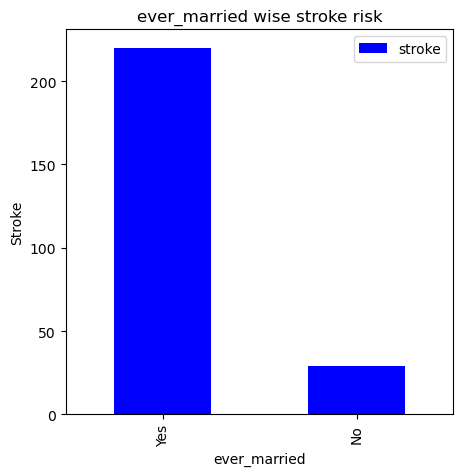

In [16]:
#ever_marriedewise Stroke 

ever_married_by_stroke=df.groupby("ever_married")["stroke"].sum().sort_values(ascending=False).nlargest(20)     
ever_married_by_stroke.plot.bar(color="blue",figsize=(5,5),fontsize=10)
plt.xlabel("ever_married",fontsize=10)
plt.ylabel("Stroke",fontsize=10)
plt.title("ever_married wise stroke risk")
plt.legend()
plt.show()


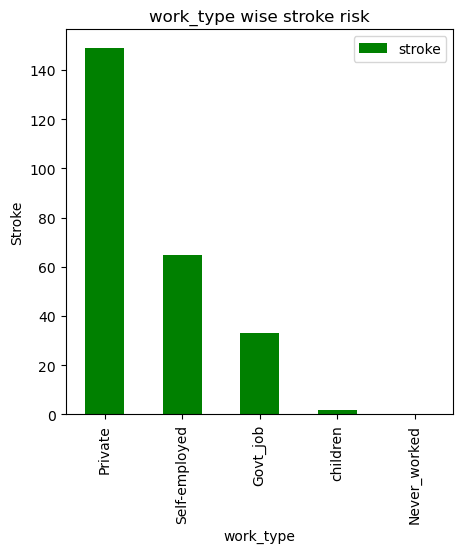

In [17]:
#work typyewise Stroke 

work_type_by_stroke=df.groupby("work_type")["stroke"].sum().sort_values(ascending=False).nlargest(20)     
work_type_by_stroke.plot.bar(color="green",figsize=(5,5),fontsize=10)
plt.xlabel("work_type",fontsize=10)
plt.ylabel("Stroke",fontsize=10)
plt.title("work_type wise stroke risk")
plt.legend()
plt.show()


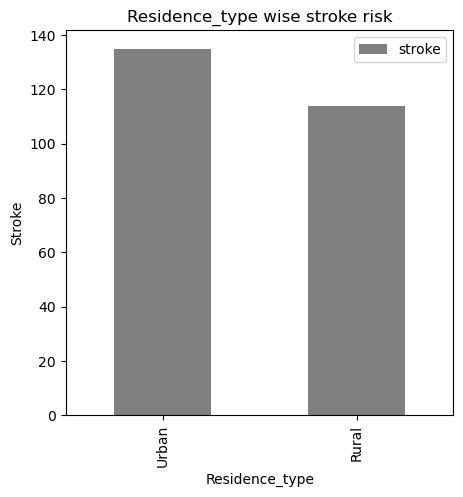

In [18]:
#Residence_type wise Stroke Risk 

Residence_type_by_stroke=df.groupby("Residence_type")["stroke"].sum().sort_values(ascending=False).nlargest(20)     
Residence_type_by_stroke.plot.bar(color="grey",figsize=(5,5),fontsize=10)
plt.xlabel("Residence_type",fontsize=10)
plt.ylabel("Stroke",fontsize=10)
plt.title("Residence_type wise stroke risk")
plt.legend()
plt.show()


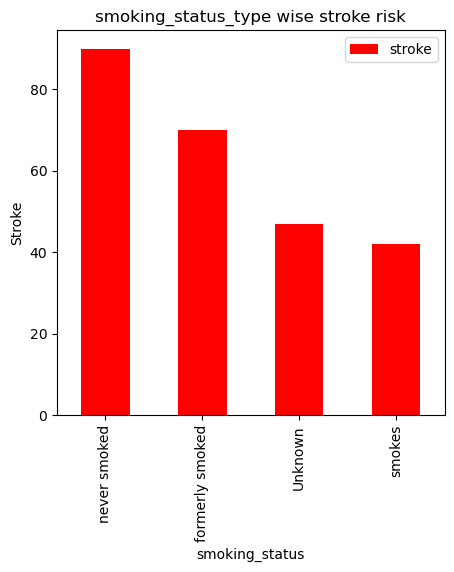

In [19]:
#smoking_status typyewise Stroke Risk [Top 20]

smoking_status_by_stroke=df.groupby("smoking_status")["stroke"].sum().sort_values(ascending=False).nlargest(20)     
smoking_status_by_stroke.plot.bar(color="red",figsize=(5,5),fontsize=10)
plt.xlabel("smoking_status",fontsize=10)
plt.ylabel("Stroke",fontsize=10)
plt.title("smoking_status_type wise stroke risk")
plt.show()


In [20]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [21]:
!pip install imblearn



<AxesSubplot:>

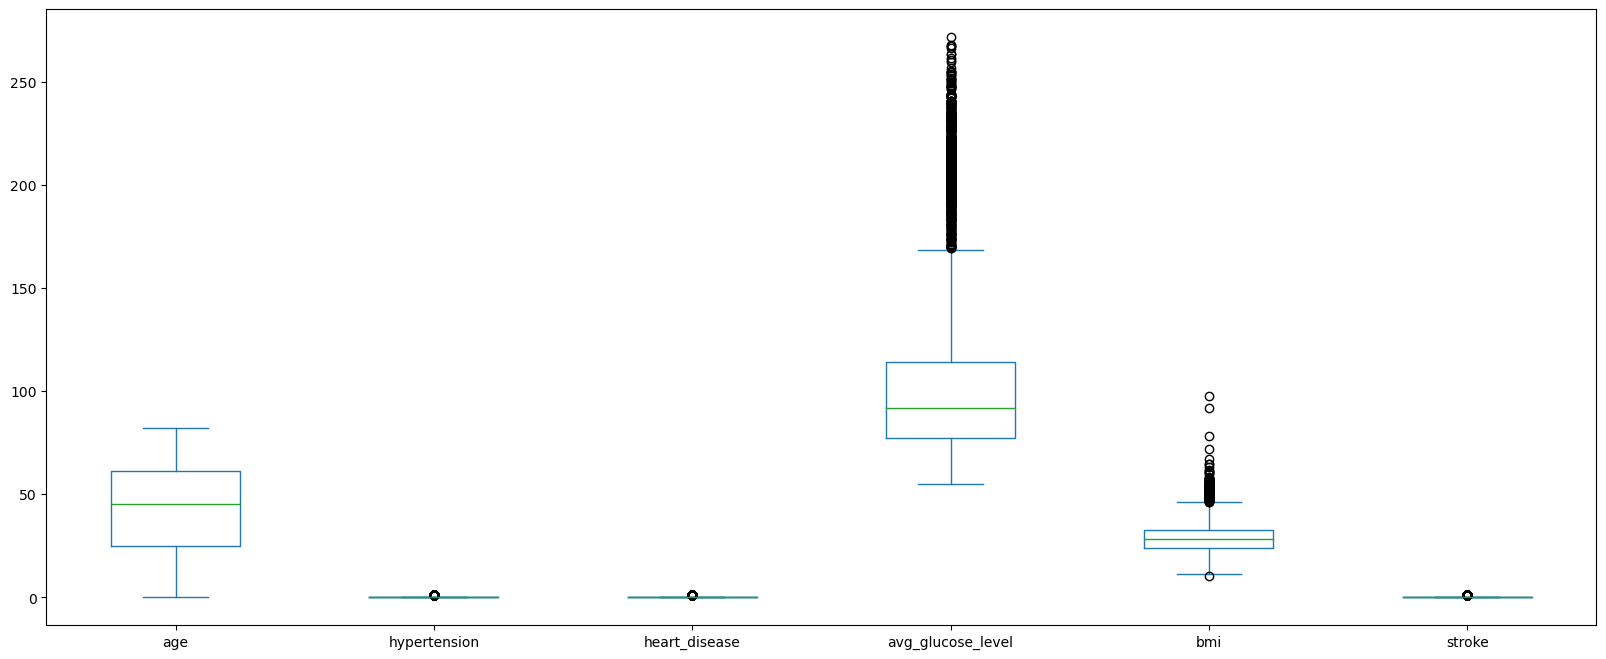

In [22]:
df.plot(kind="box",figsize=(20,8))

In [23]:
#Checking Unique values in each object type column

In [24]:
for col in df:
    if df[col].dtypes=="object":
        print("Unique in {}={}".format(col,df[col].unique()))

Unique in gender=['Male' 'Female' 'Other']
Unique in ever_married=['Yes' 'No']
Unique in work_type=['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique in Residence_type=['Urban' 'Rural']
Unique in smoking_status=['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [25]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df["gender"]=le.fit_transform(df["gender"])
df["ever_married"]=le.fit_transform(df["ever_married"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])
df["smoking_status"]=le.fit_transform(df["smoking_status"])
df["work_type"]=le.fit_transform(df["work_type"])

df.head()




,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Model Building


In [27]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

#splitting x and y into train and test data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


#Standardizing the data before applying

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)



In [28]:
x_train

array([[-0.8361144 , -0.32824306, -0.33206349, ..., -0.86023092,
         0.99513416, -0.35492266],
       [-0.8361144 , -0.41649391, -0.33206349, ..., -0.50170259,
         2.50152031, -0.35492266],
       [ 1.193598  ,  0.73076708, -0.33206349, ..., -0.90725464,
         0.24194108,  0.57814732],
       ...,
       [ 1.193598  ,  0.02476032, -0.33206349, ..., -0.25488321,
        -0.06444255,  1.5112173 ],
       [ 1.193598  , -0.9901244 , -0.33206349, ...,  0.32419302,
         0.10151525, -0.35492266],
       [-0.8361144 ,  0.64251624,  3.01147232, ..., -1.03176818,
         0.5483247 ,  0.57814732]])

# 1)Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

acc_lg=accuracy_score(y_test,y_pred)
acc_lg

0.9471624266144814

In [30]:
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat

array([[968,   0],
       [ 54,   0]], dtype=int64)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from imblearn.over_sampling import SMOTE

upsampling=SMOTE()
balanced_x,balanced_y=upsampling.fit_resample(x,y)

In [33]:
from collections import Counter

count=Counter(balanced_y)
count

Counter({1: 4861, 0: 4861})

In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(balanced_x,balanced_y,test_size=0.2,random_state=0)

sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

acc_lg=accuracy_score(y_test,y_pred)
acc_lg


0.8138817480719794

In [35]:
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat

array([[768, 205],
       [157, 815]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       973
           1       0.80      0.84      0.82       972

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945



# 2)DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

acc_dt=accuracy_score(y_test,y_pred)
acc_dt


0.8591259640102827

In [38]:
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat

array([[820, 153],
       [121, 851]], dtype=int64)

# 3)KNeighborsClassifier

for k=1, err=0.0868894601542416
for k=2, err=0.08483290488431872
for k=3, err=0.10642673521850898
for k=4, err=0.11362467866323911
for k=5, err=0.1239074550128535
for k=6, err=0.119280205655527
for k=7, err=0.13059125964010287
for k=8, err=0.12853470437018
for k=9, err=0.13624678663239076
for k=10, err=0.1413881748071979
for k=11, err=0.14550128534704365
for k=12, err=0.14395886889460152
for k=13, err=0.1496143958868894
for k=14, err=0.15218508997429303
for k=15, err=0.15321336760925452
for k=16, err=0.1460154241645244
for k=17, err=0.15218508997429303
for k=18, err=0.1506426735218509
for k=19, err=0.1542416452442159
for k=20, err=0.14858611825192802
for k=21, err=0.15269922879177378
for k=22, err=0.1516709511568124
for k=23, err=0.16041131105398454
for k=24, err=0.15629820051413879


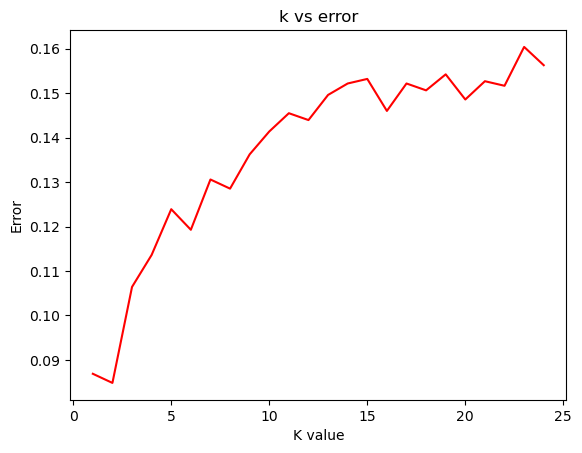

In [39]:
from sklearn.neighbors import KNeighborsClassifier

acc_list=[]
err_list=[]

for i in range(1,25):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)

    y_pred=model.predict(x_test)

    acc_knn=accuracy_score(y_test,y_pred)
    acc_list.append(acc_knn)
    
    err_knn=1-acc_knn
    err_list.append(err_knn)
    print("for k={}, err={}".format(i,err_knn))

    
plt.plot(list(range(1,25)),err_list,c="r")
plt.title("k vs error")
plt.xlabel("K value")
plt.ylabel("Error")
plt.show()

In [40]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

acc_knn=accuracy_score(y_test,y_pred)
acc_knn

0.8760925449871465

In [41]:
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat

array([[785, 188],
       [ 53, 919]], dtype=int64)

# 4)RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

acc_rf=accuracy_score(y_test,y_pred)
acc_rf

0.9362467866323907

In [43]:
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat

array([[891,  82],
       [ 42, 930]], dtype=int64)

# 5) Support Vector Classifier



In [44]:
from sklearn.svm import SVC
model=SVC()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

acc_svc=accuracy_score(y_test,y_pred)
acc_svc

0.8544987146529563

In [45]:
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat

array([[789, 184],
       [ 99, 873]], dtype=int64)

# Comparing 5 Algos


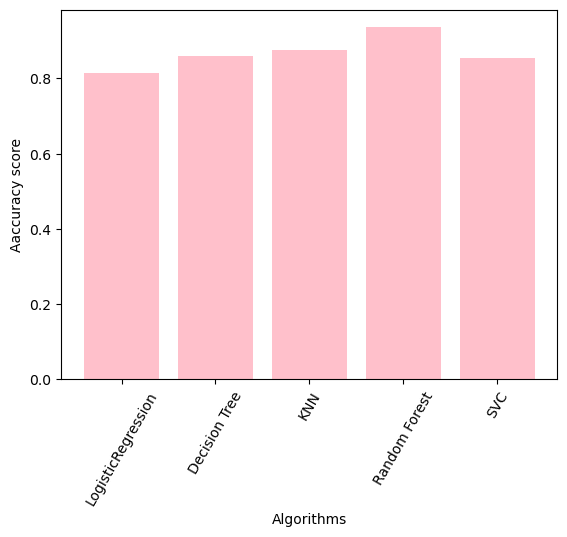

In [46]:
yy=[acc_lg,acc_dt,acc_knn,acc_rf,acc_svc]
xx=["LogisticRegression","Decision Tree","KNN","Random Forest","SVC"]
plt.xlabel("Algorithms")
plt.xticks(rotation=60)
plt.ylabel("Aaccuracy score")
plt.bar(xx,yy,color="pink")
plt.show()